># Student Number: 1832463
># Name: Phindulo Makhado

# Project 1 – Spam Classification Using Naïve Bayes

## Importing the necessary libraries

In [1]:
import nltk
import string
import re
import numpy as np
import pandas as pd
import sklearn
from nltk.corpus import stopwords, twitter_samples
import seaborn as sns
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn import metrics
from collections import Counter
import warnings

# Completing Tasks to be graded:

## 1. Preprocess the data, tokenize the text, and get a list of words for each sentence. [10 marks]

>### Step 1: Reading in data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
val_data = pd.read_csv('val.csv')

In [3]:
train_data.head()

,text,label
0,"Subject: thank you\r\nami and daren , , , ,\r\...",0
1,"Subject: spot or firm tickets\r\nvance ,\r\nth...",0
2,Subject: software\r\nmicrosoft windows xp prof...,1
3,Subject: noms / actual flow for 2 / 27\r\nwe a...,0
4,Subject: superb so . ftware\r\nyoull discover ...,1


In [4]:
num_rowstr = train_data.shape[0]
num_colstr = train_data.shape[1]
print("number of rows/entries:", num_rowstr)
print("number of columns", num_colstr)

number of rows/entries: 3102
number of columns 2


In [5]:
test_data.head()

,text,label
0,Subject: re : prc meeting agenda recap\r\nto c...,0
1,"Subject: enron actuals for april 4 , 2001\r\ne...",0
2,"Subject: february surveys\r\nhello ,\r\nwe are...",0
3,Subject: how are you today ?\r\norchard m . gu...,1
4,"Subject: 8 / 00 assignment , termination , exp...",0


In [6]:
num_rowste = test_data.shape[0]
num_colste = test_data.shape[1]
print("number of rows/entries:", num_rowste )
print("number of columns", num_colste)

number of rows/entries: 1034
number of columns 2


In [7]:
val_data.head()

,text,label
0,Subject: viagra _ cialis _ levitra _ ambien _ ...,1
1,"Subject: re : october wellhead\r\nvance ,\r\nd...",0
2,Subject: fw : danger of phenylpropanolamine\r\...,0
3,Subject: chea ; p software\r\nlooking for extr...,1
4,Subject: your mother may find out\r\nremove\r\...,1


In [8]:
num_rowsval = val_data.shape[0]
num_colsval = val_data.shape[1]
print("number of rows/entries:", num_rowsval )
print("number of columns", num_colsval)

number of rows/entries: 1035
number of columns 2


>### Step 2: Pre-process data

**Converting Texts to lower case**

In [9]:
train_data['text']=train_data['text'].str.lower()

In [10]:
train_data.head()

,text,label
0,"subject: thank you\r\nami and daren , , , ,\r\...",0
1,"subject: spot or firm tickets\r\nvance ,\r\nth...",0
2,subject: software\r\nmicrosoft windows xp prof...,1
3,subject: noms / actual flow for 2 / 27\r\nwe a...,0
4,subject: superb so . ftware\r\nyoull discover ...,1


In [11]:
test_data['text']=test_data['text'].str.lower()

In [12]:
test_data.head()

,text,label
0,subject: re : prc meeting agenda recap\r\nto c...,0
1,"subject: enron actuals for april 4 , 2001\r\ne...",0
2,"subject: february surveys\r\nhello ,\r\nwe are...",0
3,subject: how are you today ?\r\norchard m . gu...,1
4,"subject: 8 / 00 assignment , termination , exp...",0


In [13]:
val_data['text']=val_data['text'].str.lower()

In [14]:
val_data.head()

,text,label
0,subject: viagra _ cialis _ levitra _ ambien _ ...,1
1,"subject: re : october wellhead\r\nvance ,\r\nd...",0
2,subject: fw : danger of phenylpropanolamine\r\...,0
3,subject: chea ; p software\r\nlooking for extr...,1
4,subject: your mother may find out\r\nremove\r\...,1


**Text cleaning : Tokenization, Removal of stop words, Removal of digits and Removal of punctutations**

In [15]:
def preprocess_text(text):
    
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #Tokenization of the text
    Tokenized = word_tokenize(text)
    
    # create an instance of stemming
    stemmer = PorterStemmer()
    
    text_ = []
    
    for word in Tokenized:
        if (word not in stopwords.words('english')):
            stem_word = stemmer.stem(word)
            text_.append(stem_word)
            
    return text_

In [16]:
texttr = train_data['text'].values
targettr = train_data['label'].values

textte = test_data['text'].values
targette = test_data['label'].values

textval = val_data['text'].values
targetval = val_data['label'].values

In [17]:
all_train_clean = []
all_test_clean = []
all_val_clean = []

for i in texttr:
    all_train_clean.append(preprocess_text(i))
    
for j in textte:
    all_test_clean.append(preprocess_text(j))
    
for k in textval:
    all_val_clean.append(preprocess_text(k))

In [18]:
print(len(all_train_clean))
print(len(all_test_clean))
print(len(all_val_clean))

3102
1034
1035


In [19]:
all_train_clean

[['subject',
  'thank',
  'ami',
  'daren',
  'want',
  'say',
  'thank',
  'great',
  'time',
  'st',
  'pete',
  'beach',
  'fla',
  'compani',
  'food',
  'fish',
  'ye',
  'coars',
  'drink',
  'mani',
  'drink',
  'great',
  'daren',
  'relat',
  'drink',
  'enjoy',
  'meet',
  'everyon',
  'appreci',
  'busi',
  'look',
  'forward',
  'continu',
  'busi',
  'relat',
  'enron',
  'futur',
  'sincer',
  'tim'],
 ['subject',
  'spot',
  'firm',
  'ticket',
  'vanc',
  'follow',
  'nomin',
  'deal',
  'ticket',
  'sitara',
  'septemb',
  'activ',
  'pleas',
  'advis',
  'whether',
  'deal',
  'spot',
  'firm',
  'daren',
  'want',
  'everyth',
  'sitara',
  'pm',
  'monday',
  'august',
  'thank',
  'bob',
  'sourc',
  'meter',
  'sept',
  'nom',
  'ccgm',
  'lp',
  'cross',
  'tex',
  'cummin',
  'walker',
  'unk',
  'dalla',
  'product',
  'duke',
  'energi',
  'trade',
  'eex',
  'oper',
  'eog',
  'resourc',
  'hesco',
  'gather',
  'hesco',
  'gather',
  'ph',
  'explor',
  'pio

>### Step 3: Getting a list of words for each sentence

In [20]:
def get_list(data):
    vocab = []
    
    for list_of_words in data:
        for word in list_of_words:
            if word not in vocab:
                vocab.append(word)

    return vocab

list_ = get_list(all_train_clean)
list_

['subject',
 'thank',
 'ami',
 'daren',
 'want',
 'say',
 'great',
 'time',
 'st',
 'pete',
 'beach',
 'fla',
 'compani',
 'food',
 'fish',
 'ye',
 'coars',
 'drink',
 'mani',
 'relat',
 'enjoy',
 'meet',
 'everyon',
 'appreci',
 'busi',
 'look',
 'forward',
 'continu',
 'enron',
 'futur',
 'sincer',
 'tim',
 'spot',
 'firm',
 'ticket',
 'vanc',
 'follow',
 'nomin',
 'deal',
 'sitara',
 'septemb',
 'activ',
 'pleas',
 'advis',
 'whether',
 'everyth',
 'pm',
 'monday',
 'august',
 'bob',
 'sourc',
 'meter',
 'sept',
 'nom',
 'ccgm',
 'lp',
 'cross',
 'tex',
 'cummin',
 'walker',
 'unk',
 'dalla',
 'product',
 'duke',
 'energi',
 'trade',
 'eex',
 'oper',
 'eog',
 'resourc',
 'hesco',
 'gather',
 'ph',
 'explor',
 'pioneer',
 'pure',
 'rio',
 'vista',
 'samson',
 'lonestar',
 'swift',
 'tema',
 'oil',
 'ga',
 'tri',
 'union',
 'develop',
 'white',
 'petroleum',
 'softwar',
 'microsoft',
 'window',
 'xp',
 'professiozn',
 'retail',
 'price',
 'low',
 'prici',
 'save',
 'adob',
 'photoshko

>### Adding evaluation Functions

In [21]:
def confusion_metrics(conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the Recall
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Recall: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
def accuracy(y_true,y_pred):
    #calculating the accuracy
    acc = np.sum(y_true==y_pred)/len(y_true)
    #This is RootMean Square Error .which is to find out the error ratio of models
    RMSE = np.sqrt(np.square(np.subtract(y_true,y_pred)).mean())
    return acc,RMSE

## 2. Train a standard Naive Bayes model. Call this Model1 [10 marks].

>#### Feature Extraction

In [22]:
def Extractfeature(text, list_):
    sent_vec = []
    for token in list_:
        if token in text:
            sent_vec.append(text.count(token))
        else:
            sent_vec.append(0)
        
    return sent_vec

feature_train = []
feature_test = []
feature_val = []

for i in all_train_clean:
    feature_train.append(Extractfeature(i,list_))
    
for j in all_test_clean:
    feature_test.append(Extractfeature(j,list_))
    
for k in all_val_clean:
    feature_val.append(Extractfeature(k,list_))

feature_train = np.array(feature_train)
feature_test = np.array(feature_test)
feature_val = np.array(feature_val)

In [23]:
# Using the Multinomial Naive Bayes model from sklearn
# method fit trains/fits the model, using our training data
model1 = MultinomialNB()
model1.fit(feature_train, targettr)

# getting the predictions from the trained model
y_pred1 = model1.predict(feature_test)

                 Predicted Negative  Predicted Positive
Actual Negative                 726                   8
Actual Positive                  24                 276
--------------------------------------------------------------
True Positives: 276
True Negatives: 726
False Positives: 8
False Negatives: 24
--------------------------------------------------
Accuracy: 0.97
Recall: 0.92
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.95
--------------------------------------------------------------
Accuracy: 96.90522243713733 %
Root Mean Square Error: 17.5919798853417 %
ROC AUC Score: 0.9545504087193459


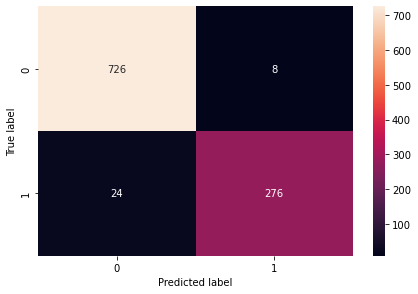

In [24]:
cm1 = confusion_matrix(targette, y_pred1)
cm_df1 = pd.DataFrame(cm1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df1)
f = sns.heatmap(cm1, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cm1)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targette,y_pred1)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targette,y_pred1)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targette, y_pred1, multi_class="ovr") )

## 3. Train 4 additional Naïve Bayes models with the following variations:

>### Creating Functions to filter out the required most frequent features

In [25]:
def get_word_frequency(text):
    freq_text = {}
    for t in text:
        for word in t:
            if word in freq_text:
                freq_text[word] += 1
            else:
                freq_text[word] = 1
                
    return freq_text

def get_N_most_features(text, N_feature):
    sentence_vectors = []
    for sentence in text:
        sent_vec = []
        for token in N_feature:
            if token in sentence:
                sent_vec.append(sentence.count(token))
            else:
                sent_vec.append(0)
        sentence_vectors.append(sent_vec)
        
    return sentence_vectors


### a. Use only the 10 most frequent words as features. Call this Model2 [10 marks].

>#### Getting 10 most common features

In [26]:
Word_freq_10 = get_word_frequency(all_train_clean)
# get dictionary with 10 most frequent word
Word_freq_10dict = dict(Counter(Word_freq_10).most_common(10))

# get list with 10 most frequent word
most_common10 = list(Word_freq_10dict.keys())

most_common10vectortr = np.array(get_N_most_features(all_train_clean, most_common10))
most_common10vectorte = np.array(get_N_most_features(all_test_clean, most_common10))
most_common10vectorval = np.array(get_N_most_features(all_val_clean, most_common10))

>#### Training the  10 most common features from the training set on a Naïve Bayes model

In [27]:
model2 = MultinomialNB(alpha = 1.0)
model2.fit(most_common10vectortr, targettr)

MultinomialNB()

### b. Use only the 100 most frequent words as features. Call this Model3 [10 marks].

>#### Getting 100 most common features

In [28]:
Word_freq_100 = get_word_frequency(all_train_clean)
# get dictionary with 10 most frequent word
Word_freq_100dict = dict(Counter(Word_freq_100).most_common(100))

# get list with 10 most frequent word
most_common100 = list(Word_freq_100dict.keys())

most_common100vectortr = np.array(get_N_most_features(all_train_clean, most_common100))
most_common100vectorte = np.array(get_N_most_features(all_test_clean, most_common100))
most_common100vectorval = np.array(get_N_most_features(all_val_clean, most_common100))

>#### Training the  100 most common features on a Naïve Bayes model

In [29]:
model3 = MultinomialNB(alpha = 1.0)
model3.fit(most_common100vectortr, targettr)

MultinomialNB()

### c. Remove the 100 most frequent words from the features. Call this Model4 [10 marks].

>#### Removing the 100 most frequent words from the features

In [31]:
siz1 = len(list_)
print("The length of the list of words from the training set is:", siz1)
# Removing 100 most frequent words

most_freq100romved = [i for i in list_ if i not in most_common100]
siz2 = len(most_freq100romved)
print("The length of the list of words from the training set is:", siz2)

The length of the list of words from the training set is: 28549
The length of the list of words from the training set is: 28449


>#### Getting features on the list with 100 frequent features removed

In [32]:
most_removed100vectortr = np.array(get_N_most_features(all_train_clean, most_freq100romved))
most_removed100vectorte = np.array(get_N_most_features(all_test_clean, most_freq100romved))
most_removed100vectorval = np.array(get_N_most_features(all_val_clean, most_freq100romved))

>#### Training the new set with 100 frequent features removed

In [33]:
model4 = MultinomialNB(alpha = 1.0)
model4.fit(most_removed100vectortr, targettr)

MultinomialNB()

### d. Use only the subject line (see the data) as the feature set. Call this Model5 [10 marks].

In [34]:
def get_sub_data(dataset):
    x =  dataset['text']
    processed_subject = []
    for text in x:
    # Subject
            subject = text.split("\r\n")[0]
            subject = re.sub(r'[^\w\s]', '', subject)
            subject = subject.lower()
            subject = subject.split()

            # Add processed text to list
            processed_subject.append(subject)
    return processed_subject

In [35]:
subject_tr = get_sub_data(train_data)
subject_te = get_sub_data(test_data)
subject_val = get_sub_data(val_data)

In [36]:
feature_subtrain = []
feature_subtest = []
feature_subval = []

for i in subject_tr:
    feature_subtrain.append(Extractfeature(i,list_))
    
for j in subject_te:
    feature_subtest.append(Extractfeature(j,list_))
    
for k in subject_val:
    feature_subval.append(Extractfeature(k,list_))

>#### Training the subject line used as feature set data

In [42]:
model5 = MultinomialNB(alpha = 1.0)
model5.fit(feature_subtrain, targettr)

MultinomialNB()

## 4. Evaluate the performance of the first model and all 4 variations using the validation set.

### a. Calculate the evaluation metrics [10 marks].

>#### Using model1 using the validation set

In [43]:
y_predval1 = model1.predict(feature_val)

>#### Calculating the Evaluation metrics for model1 on the validation set

                 Predicted Negative  Predicted Positive
Actual Negative                 722                  13
Actual Positive                  19                 281
--------------------------------------------------------------
True Positives: 281
True Negatives: 722
False Positives: 13
False Negatives: 19
--------------------------------------------------
Accuracy: 0.97
Recall: 0.94
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.96
--------------------------------------------------------------
Accuracy: 96.90821256038647 %
Root Mean Square Error: 17.58347929055432 %
ROC AUC Score: 0.9594897959183674


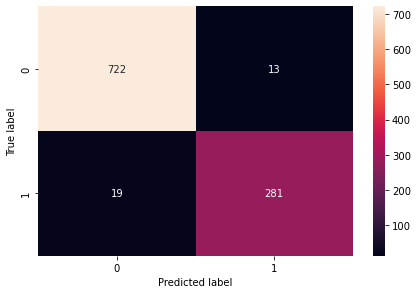

In [44]:
cm1v = confusion_matrix(targetval, y_predval1)
cm_df1v = pd.DataFrame(cm1v, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df1v)
f = sns.heatmap(cm1v, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cm1v)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targetval,y_predval1)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targetval,y_predval1)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targetval, y_predval1, multi_class="ovr") )

>#### Using model2 using validation set

In [45]:
y_pred10val = model2.predict(most_common10vectorval)

>#### Calculating the Evaluation metrics for model2 on the validation set

                 Predicted Negative  Predicted Positive
Actual Negative                 538                 197
Actual Positive                  11                 289
--------------------------------------------------------------
True Positives: 289
True Negatives: 538
False Positives: 197
False Negatives: 11
--------------------------------------------------
Accuracy: 0.8
Recall: 0.96
Specificity: 0.73
Precision: 0.73
f_1 Score: 0.83
--------------------------------------------------------------
Accuracy: 79.90338164251207 %
Root Mean Square Error: 44.829252009695544 %
ROC AUC Score: 0.8476530612244897


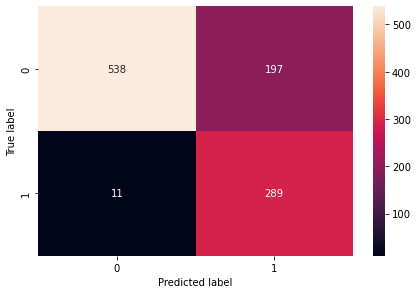

In [46]:
cmval10 = confusion_matrix(targetval, y_pred10val)
cm_dfval10 = pd.DataFrame(cmval10, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfval10)
f = sns.heatmap(cmval10, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cmval10)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targetval,y_pred10val)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targetval,y_pred10val)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targetval, y_pred10val, multi_class="ovr") )

>#### Using model3 on the validation set

In [47]:
y_pred100val = model3.predict(most_common100vectorval)

>#### Calculating the Evaluation metrics for model3 on the validation set

                 Predicted Negative  Predicted Positive
Actual Negative                 640                  95
Actual Positive                  47                 253
--------------------------------------------------------------
True Positives: 253
True Negatives: 640
False Positives: 95
False Negatives: 47
--------------------------------------------------
Accuracy: 0.86
Recall: 0.84
Specificity: 0.87
Precision: 0.87
f_1 Score: 0.86
--------------------------------------------------------------
Accuracy: 86.28019323671498 %
Root Mean Square Error: 37.04025750893887 %
ROC AUC Score: 0.8570408163265305


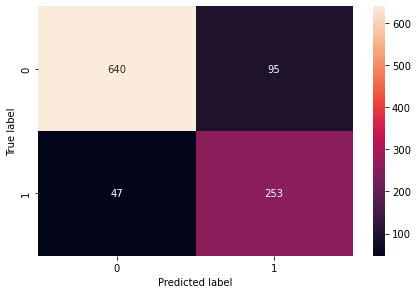

In [48]:
cmval100 = confusion_matrix(targetval, y_pred100val)
cm_dfval100 = pd.DataFrame(cmval100, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfval100)
f = sns.heatmap(cmval100, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cmval100)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targetval,y_pred100val)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targetval,y_pred100val)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targetval, y_pred100val, multi_class="ovr") )

>#### Using model4 on the validation set

In [49]:
y_pred100removedvalr = model4.predict(most_removed100vectorval)

>#### Calculating the Evaluation metrics for model4 on the validation set

                 Predicted Negative  Predicted Positive
Actual Negative                 730                   5
Actual Positive                  27                 273
--------------------------------------------------------------
True Positives: 273
True Negatives: 730
False Positives: 5
False Negatives: 27
--------------------------------------------------
Accuracy: 0.97
Recall: 0.91
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.95
--------------------------------------------------------------
Accuracy: 96.90821256038647 %
Root Mean Square Error: 17.58347929055432 %
ROC AUC Score: 0.9515986394557823


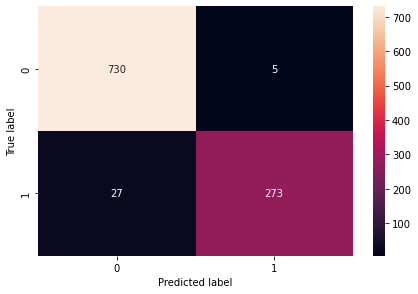

In [50]:
cmval100r = confusion_matrix(targetval, y_pred100removedvalr)
cm_dfval100r = pd.DataFrame(cmval100r, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfval100r)
f = sns.heatmap(cmval100r, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cmval100r)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targetval,y_pred100removedvalr)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targetval,y_pred100removedvalr)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targetval, y_pred100removedvalr, multi_class="ovr") )

>#### Using model5 on the validation set

In [51]:
y_predsubject_val = model5.predict(feature_subval)

>#### Calculating the Evaluation metrics for model5 on the validation set

                 Predicted Negative  Predicted Positive
Actual Negative                 724                  11
Actual Positive                 162                 138
--------------------------------------------------------------
True Positives: 138
True Negatives: 724
False Positives: 11
False Negatives: 162
--------------------------------------------------
Accuracy: 0.83
Recall: 0.46
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.63
--------------------------------------------------------------
Accuracy: 83.28502415458937 %
Root Mean Square Error: 40.883952653101716 %
ROC AUC Score: 0.7225170068027211


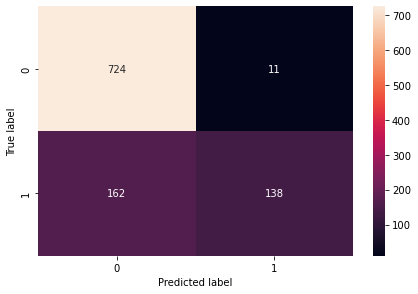

In [52]:
cmval100s = confusion_matrix(targetval, y_predsubject_val)
cm_dfval100s = pd.DataFrame(cmval100s, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfval100s)
f = sns.heatmap(cmval100s, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cmval100s)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targetval,y_predsubject_val)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targetval,y_predsubject_val)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targetval, y_predsubject_val, multi_class="ovr") )

### b. Compare all 5 models [5 marks].

In [53]:
model1_accuracy = accuracy(targetval, y_predval1)[0]*100
model1_f1_score = metrics.f1_score(targetval, y_predval1)*100
model1_precision = metrics.precision_score(targetval, y_predval1)*100
model1_recall = metrics.recall_score(targetval, y_predval1)*100

model2_accuracy = accuracy(targetval,y_pred10val)[0]*100
model2_f1_score = metrics.f1_score(targetval, y_pred10val)*100
model2_precision = metrics.precision_score(targetval, y_pred10val)*100
model2_recall = metrics.recall_score(targetval, y_pred10val)*100

model3_accuracy = accuracy(targetval,y_pred100val)[0]*100
model3_f1_score = metrics.f1_score(targetval, y_pred100val)*100
model3_precision = metrics.precision_score(targetval, y_pred100val)*100
model3_recall = metrics.recall_score(targetval, y_pred100val)*100

model4_accuracy = accuracy(targetval,y_pred100removedvalr)[0]*100
model4_f1_score = metrics.f1_score(targetval, y_pred100removedvalr)*100
model4_precision = metrics.precision_score(targetval, y_pred100removedvalr)*100
model4_recall = metrics.recall_score(targetval, y_pred100removedvalr)*100

model5_accuracy = accuracy(targetval,y_predsubject_val)[0]*100
model5_f1_score = metrics.f1_score(targetval, y_predsubject_val)*100
model5_precision = metrics.precision_score(targetval, y_predsubject_val)*100
model5_recall = metrics.recall_score(targetval, y_predsubject_val)*100
warnings.filterwarnings("ignore")

In [54]:
print("Models Comparison via Evaluation Metrics on the validation set")
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")

print("Model1 Evaluation Metrics on the validation set")
print("------------------------------------------------")
print("accuracy for model1 is:", model1_accuracy,"%")
print("F1_score for model1 is:", model1_f1_score,"%")
print("Precision for model1 is:", model1_precision,"%")
print("Recall for model1 is:", model1_recall,"%")
print("----------------------------------------------------------------------------------")

print("Model2 Evaluation Metrics on the validation set")
print("------------------------------------------------")
print("accuracy for model2 is:", model2_accuracy,"%")
print("F1_score for model2 is:", model2_f1_score,"%")
print("Precision for model2 is:", model2_precision,"%")
print("Recall for model2 is:", model2_recall,"%")
print("----------------------------------------------------------------------------------")

print("Model3 Evaluation Metrics on the validation set")
print("------------------------------------------------")
print("accuracy for model3 is:", model3_accuracy,"%")
print("F1_score for model3 is:", model3_f1_score,"%")
print("Precision for model3 is:", model3_precision,"%")
print("Recall for model3 is:", model3_recall,"%")
print("----------------------------------------------------------------------------------")

print("Model4 Evaluation Metrics on the validation set")
print("------------------------------------------------")
print("accuracy for model4 is:", model4_accuracy,"%")
print("F1_score for model4 is:", model4_f1_score,"%")
print("Precision for model4 is:", model4_precision,"%")
print("Recall for model4 is:", model4_recall,"%")
print("----------------------------------------------------------------------------------")

print("Model5 Evaluation Metrics on the validation set")
print("------------------------------------------------")
print("accuracy for model5 is:", model5_accuracy,"%")
print("F1_score for model5 is:", model5_f1_score,"%")
print("Precision for model5 is:", model5_precision,"%")
print("Recall for model5 is:", model5_recall,"%")
print("----------------------------------------------------------------------------------")

Models Comparison via Evaluation Metrics on the validation set
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
Model1 Evaluation Metrics on the validation set
------------------------------------------------
accuracy for model1 is: 96.90821256038647 %
F1_score for model1 is: 94.6127946127946 %
Precision for model1 is: 95.578231292517 %
Recall for model1 is: 93.66666666666667 %
----------------------------------------------------------------------------------
Model2 Evaluation Metrics on the validation set
------------------------------------------------
accuracy for model2 is: 79.90338164251207 %
F1_score for model2 is: 73.53689567430024 %
Precision for model2 is: 59.465020576131685 %
Recall for model2 is: 

### c. Make a recommendation about which model to use with reasons. [5 marks].

***Model1 is better to use***

***Reason:***- It produced the best accuracy and F1_score. It furthermore produced the second best Precision score and third best Recall score

## 5. Now, evaluate all the models with the test set

### a. Calculate the evaluation metrics [10 marks].

>#### getting predictions using model1 on the Test set

In [55]:
y_predt1 = model1.predict(feature_test)

>#### Calculating the Evaluation metrics for model1 on the Testing set

                 Predicted Negative  Predicted Positive
Actual Negative                 726                   8
Actual Positive                  24                 276
--------------------------------------------------------------
True Positives: 276
True Negatives: 726
False Positives: 8
False Negatives: 24
--------------------------------------------------
Accuracy: 0.97
Recall: 0.92
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.95
--------------------------------------------------------------
Accuracy: 96.90522243713733 %
Root Mean Square Error: 17.5919798853417 %
ROC AUC Score: 0.9545504087193459


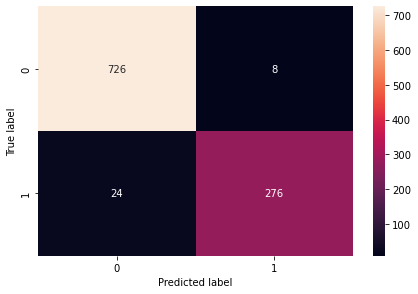

In [56]:
cm1 = confusion_matrix(targette, y_predt1)
cm_df1 = pd.DataFrame(cm1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df1)
f = sns.heatmap(cm1, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cm1)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targette,y_predt1)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targette,y_predt1)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targette, y_predt1, multi_class="ovr") )

>#### getting predictions using model2 on the Test set

In [57]:
y_predt10 = model2.predict(most_common10vectorte)

>#### Calculating the Evaluation metrics for model2 on the Testing set

                 Predicted Negative  Predicted Positive
Actual Negative                 545                 189
Actual Positive                  12                 288
--------------------------------------------------------------
True Positives: 288
True Negatives: 545
False Positives: 189
False Negatives: 12
--------------------------------------------------
Accuracy: 0.81
Recall: 0.96
Specificity: 0.74
Precision: 0.74
f_1 Score: 0.84
--------------------------------------------------------------
Accuracy: 80.56092843326887 %
Root Mean Square Error: 44.08976249281815 %
ROC AUC Score: 0.8512534059945503


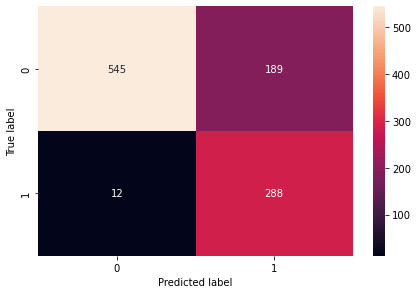

In [58]:
cmte10 = confusion_matrix(targette, y_predt10)
cm_dfte10 = pd.DataFrame(cmte10, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfte10)
f = sns.heatmap(cmte10, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cmte10)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targette,y_predt10)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targette,y_predt10)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targette, y_predt10, multi_class="ovr") )

>#### getting predictions using model3 on the Test set

In [59]:
y_predt100 = model3.predict(most_common100vectorte)

>#### Calculating the Evaluation metrics for model3 on the Testing set

                 Predicted Negative  Predicted Positive
Actual Negative                 650                  84
Actual Positive                  36                 264
--------------------------------------------------------------
True Positives: 264
True Negatives: 650
False Positives: 84
False Negatives: 36
--------------------------------------------------
Accuracy: 0.88
Recall: 0.88
Specificity: 0.89
Precision: 0.89
f_1 Score: 0.88
--------------------------------------------------------------
Accuracy: 88.39458413926499 %
Root Mean Square Error: 34.06672256137213 %
ROC AUC Score: 0.8827792915531334


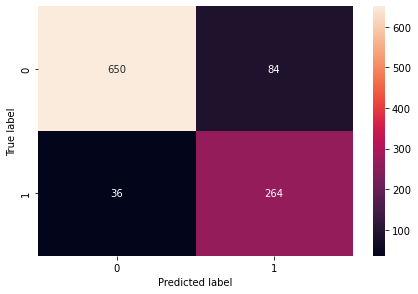

In [60]:
cmte100 = confusion_matrix(targette, y_predt100)
cm_dfte100 = pd.DataFrame(cmte100, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfte100)
f = sns.heatmap(cmte100, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cmte100)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targette,y_predt100)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targette,y_predt100)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targette, y_predt100, multi_class="ovr") )

>#### getting predictions using model4 on the Test set

In [61]:
y_predt100r = model4.predict(most_removed100vectorte)

>#### Calculating the Evaluation metrics for model4 on the Testing set

                 Predicted Negative  Predicted Positive
Actual Negative                 729                   5
Actual Positive                  31                 269
--------------------------------------------------------------
True Positives: 269
True Negatives: 729
False Positives: 5
False Negatives: 31
--------------------------------------------------
Accuracy: 0.97
Recall: 0.9
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.94
--------------------------------------------------------------
Accuracy: 96.5183752417795 %
Root Mean Square Error: 18.659112407133687 %
ROC AUC Score: 0.9449273387829246


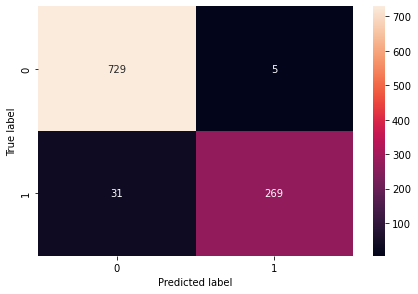

In [62]:
cmte100r = confusion_matrix(targette, y_predt100r)
cm_dfte100r = pd.DataFrame(cmte100r, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfte100r)
f = sns.heatmap(cmte100r, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cmte100r)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targette,y_predt100r)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targette,y_predt100r)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targette, y_predt100r, multi_class="ovr") )

>#### getting predictions using model5 on the Test set

In [63]:
y_predsubject_tr = model5.predict(feature_subtest)

>#### Calculating the Evaluation metrics for model5 on the Testing set

                 Predicted Negative  Predicted Positive
Actual Negative                 729                   5
Actual Positive                  31                 269
--------------------------------------------------------------
True Positives: 156
True Negatives: 721
False Positives: 13
False Negatives: 144
--------------------------------------------------
Accuracy: 0.85
Recall: 0.52
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.68
--------------------------------------------------------------
Accuracy: 84.81624758220502 %
Root Mean Square Error: 38.96633472344425 %
ROC AUC Score: 0.7511444141689373


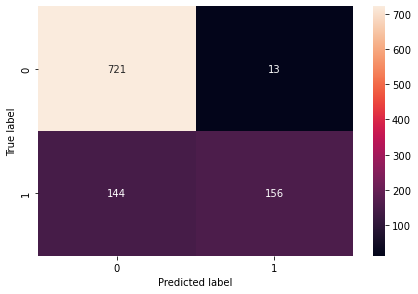

In [64]:
cmtes = confusion_matrix(targette, y_predsubject_tr)
cm_dftes = pd.DataFrame(cmte100r, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dftes)
f = sns.heatmap(cmtes, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cmtes)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targette,y_predsubject_tr)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targette,y_predsubject_tr)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targette, y_predsubject_tr, multi_class="ovr") )

### b. Is your recommendation (in 4c above) still is valid? Explain [5 marks].

In [65]:
model1_accuracyt = accuracy(targette, y_predt1)[0]*100
model1_f1_scoret = metrics.f1_score(targette, y_predt1)*100
model1_precisiont = metrics.precision_score(targette, y_predt1)*100
model1_recallt = metrics.recall_score(targette, y_predt1)*100

model2_accuracyt = accuracy(targette, y_predt10)[0]*100
model2_f1_scoret = metrics.f1_score(targette, y_predt10)*100
model2_precisiont = metrics.precision_score(targette, y_predt10)*100
model2_recallt = metrics.recall_score(targette, y_predt10)*100

model3_accuracyt = accuracy(targette, y_predt100)[0]*100
model3_f1_scoret = metrics.f1_score(targette, y_predt100)*100
model3_precisiont = metrics.precision_score(targette, y_predt100)*100
model3_recallt = metrics.recall_score(targette, y_predt100)*100

model4_accuracyt = accuracy(targette, y_predt100r)[0]*100
model4_f1_scoret = metrics.f1_score(targette, y_predt100r)*100
model4_precisiont = metrics.precision_score(targette, y_predt100r)*100
model4_recallt = metrics.recall_score(targette, y_predt100r)*100

model5_accuracyt = accuracy(targette, y_predsubject_tr)[0]*100
model5_f1_scoret = metrics.f1_score(targette, y_predsubject_tr)*100
model5_precisiont = metrics.precision_score(targette, y_predsubject_tr)*100
model5_recallt = metrics.recall_score(targette, y_predsubject_tr)*100
warnings.filterwarnings("ignore")

In [66]:
print("Models Comparison via Evaluation Metrics on the Test set")
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")


print("Model1 Evaluation Metrics on the Test set")
print("------------------------------------------------")
print("accuracy for model1 is:", model1_accuracyt,"%")
print("F1_score for model1 is:", model1_f1_scoret,"%")
print("Precision for model1 is:", model1_precisiont,"%")
print("Recall for model1 is:", model1_recallt,"%")
print("----------------------------------------------------------------------------------")

print("Model2 Evaluation Metrics on the Test set")
print("------------------------------------------------")
print("accuracy for model2 is:", model2_accuracyt,"%")
print("F1_score for model2 is:", model2_f1_scoret,"%")
print("Precision for model2 is:", model2_precisiont,"%")
print("Recall for model2 is:", model2_recallt,"%")
print("----------------------------------------------------------------------------------")

print("Model3 Evaluation Metrics on the Test set")
print("------------------------------------------------")
print("accuracy for model3 is:", model3_accuracyt,"%")
print("F1_score for model3 is:", model3_f1_scoret,"%")
print("Precision for model3 is:", model3_precisiont,"%")
print("Recall for model3 is:", model3_recallt,"%")
print("----------------------------------------------------------------------------------")

print("Model4 Evaluation Metrics on the Test set")
print("------------------------------------------------")
print("accuracy for model4 is:", model4_accuracyt,"%")
print("F1_score for model4 is:", model4_f1_scoret,"%")
print("Precision for model4 is:", model4_precisiont,"%")
print("Recall for model4 is:", model4_recallt,"%")
print("----------------------------------------------------------------------------------")

print("Model5 Evaluation Metrics on the Test set")
print("------------------------------------------------")
print("accuracy for model5 is:", model5_accuracyt,"%")
print("F1_score for model5 is:", model5_f1_scoret,"%")
print("Precision for model5 is:", model5_precisiont,"%")
print("Recall for model5 is:", model5_recallt,"%")
print("----------------------------------------------------------------------------------")

Models Comparison via Evaluation Metrics on the Test set
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
Model1 Evaluation Metrics on the Test set
------------------------------------------------
accuracy for model1 is: 96.90522243713733 %
F1_score for model1 is: 94.5205479452055 %
Precision for model1 is: 97.1830985915493 %
Recall for model1 is: 92.0 %
----------------------------------------------------------------------------------
Model2 Evaluation Metrics on the Test set
------------------------------------------------
accuracy for model2 is: 80.56092843326887 %
F1_score for model2 is: 74.13127413127413 %
Precision for model2 is: 60.37735849056604 %
Recall for model2 is: 96.0 %
------------------------

**recommendation:**- Yes my recommendation is still the same, model1 is still the best to use

**Explanation:** -while evaluating using the test set, the metrics remained the same and model1 still was the best 

## 6. Implement at least one more variation to improve the performance of the best model. For instance, use frequent n-grams as features. The improvement should be on at least one of the evaluation metrics. Cleary describe the improved model and explain how it is an improvement. [5 marks]

In [67]:
def count_n_grams(data, n, start_token='<s>', end_token = '<e>'):
    # Initialize dictionary of n-grams and their counts
    n_grams = {}
    i = 0
    # YOUR CODE HERE
    for words in data:
        words = [start_token] * n + words + [end_token]
        words = tuple(words)
        for i in range(len(words) - (n - 1)):
            n_gram = " ".join(words[i: i + n])
            if n_gram in n_grams:
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1
    return n_grams


>#### Creating Bigrams

In [68]:
n_grambigramstr = count_n_grams(all_train_clean,2)
n_grambigramste = count_n_grams(all_test_clean,2)
n_grambigramsval = count_n_grams(all_val_clean,2)


>#### Creating Trigrams

In [69]:
n_gramtrigramstr = count_n_grams(all_train_clean,3)
n_gramtrigramstr = count_n_grams(all_test_clean,3)
n_gramtrigramstr = count_n_grams(all_val_clean,3)

>#### Getting 100 frequent bigrams as features

In [70]:
Word_freqbi_100 = get_word_frequency(n_grambigramstr)
# get dictionary with 100 most frequent word
Word_freqbi_100dict = dict(Counter(Word_freqbi_100).most_common(100))

# get list with 100 most frequent word
most_commonbi100 = list(Word_freqbi_100dict.keys())

frequent_bigram100vectortr = np.array(get_N_most_features(all_train_clean, most_commonbi100))
frequent_bigram100vectorte = np.array(get_N_most_features(all_test_clean, most_commonbi100))
frequent_bigram100vectorval = np.array(get_N_most_features(all_val_clean, most_commonbi100))

frequent_bigram100vectortr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

>#### Getting 100 frequent Trigrams as features

In [71]:
Word_freqtri_100 = get_word_frequency(n_gramtrigramstr)
# get dictionary with 100 most trigams frequent word
Word_freqtri_100dict = dict(Counter(Word_freqtri_100).most_common(100))

# get list with 100 most trigrams frequent word
most_commontri100 = list(Word_freqtri_100dict.keys())

frequent_Trigram100vectortr = np.array(get_N_most_features(all_train_clean, most_commontri100))
frequent_Trigram100vectorte = np.array(get_N_most_features(all_test_clean, most_commontri100))
frequent_Trigram100vectorval = np.array(get_N_most_features(all_val_clean, most_commontri100))

frequent_Trigram100vectortr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

>#### Training and Predicting 100 frequent bigrams using Naive Bayes best model, model1

In [72]:
model4 = MultinomialNB(alpha = 1.0)
model4.fit(frequent_bigram100vectortr, targettr)
y_predbi = model4.predict(frequent_bigram100vectorte)

>#### Evaluating the 100 frequent bigrams trained on model1

                 Predicted Negative  Predicted Positive
Actual Negative                 710                  24
Actual Positive                 218                  82
--------------------------------------------------------------
True Positives: 82
True Negatives: 710
False Positives: 24
False Negatives: 218
--------------------------------------------------
Accuracy: 0.77
Recall: 0.27
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.43
--------------------------------------------------------------
Accuracy: 76.59574468085107 %
Root Mean Square Error: 48.37794468468967 %
ROC AUC Score: 0.6203178928247048


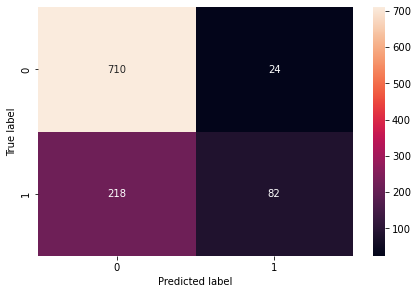

In [73]:
cm100bi = confusion_matrix(targette, y_predbi)
cm_df100bi = pd.DataFrame(cm100bi, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df100bi)
f = sns.heatmap(cm100bi, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cm100bi)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targette,y_predbi)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targette,y_predbi)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targette, y_predbi, multi_class="ovr") )

>#### Training and Predicting 100 frequent trigrams using Naive Bayes best model, model1

In [74]:
model4 = MultinomialNB(alpha = 1.0)
model4.fit(frequent_Trigram100vectortr, targettr)
y_predtri = model4.predict(frequent_Trigram100vectorte)

>#### Evaluating the 100 frequent trigrams trained on model1

                 Predicted Negative  Predicted Positive
Actual Negative                 710                  24
Actual Positive                 218                  82
--------------------------------------------------------------
True Positives: 82
True Negatives: 710
False Positives: 24
False Negatives: 218
--------------------------------------------------
Accuracy: 0.77
Recall: 0.27
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.43
--------------------------------------------------------------
Accuracy: 76.59574468085107 %
Root Mean Square Error: 48.37794468468967 %
ROC AUC Score: 0.6203178928247048


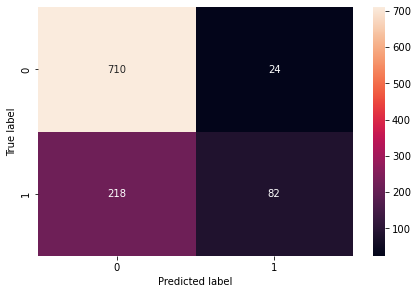

In [75]:
cm100tri = confusion_matrix(targette, y_predtri)
cm_df100tri = pd.DataFrame(cm100tri, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df100tri)
f = sns.heatmap(cm100tri, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("--------------------------------------------------------------")
confusion_metrics(cm100tri)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(targette,y_predtri)[0]*100,"%")
print('Root Mean Square Error:', accuracy(targette,y_predtri)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(targette, y_predtri, multi_class="ovr") )

***Explanation*** From the best model1, while training on the best 100 bigram and trigram sets, the precision score improved to 97%, which means one of the evaluation metric was improved by using frequent n-grams as features.